### **Demo: Machine Learning Approach Step By Step: Diabetes Prediction**

#### ***Workflow:***


> * Understanding the problem
> * Collecting Data
> * Wrangling, Cleansing, Analyzing and Preparing the data
> * Creating a base model
>> * Train Algorithm
>> * Test Algorithm
> * Re-analyzing the prepared data
>* Improving the model
>* Model Performance


##**Understanding the Problem**




###**Problem Definition**

A healthcare company wants to check if the patient has diabetes or not based on some diagnostic measurements. 

You, as a data scientist, are given the task to build a Machine Learning model that is capable of predicting if a patient has diabetes.
 

###**Dataset Description**

> **DATASET:** *Pima Indians Diabetes.csv*


The dataset was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (a subgroup of Native Americans) and are females of ages 21 and above.


The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**NOTE:** You can use this dataset to train your machine learning model to predict whether the patient has diabetes or not.

###**Objective**

>* **Classify:** We want to predict if a patient is diabetic or not.
>* **Collecting the data**
>* **Analyzing and Preparing the data:** We may need to convert the categorical values to numerical values. If the dataset contains null values, we will have to fill those values or remove those samples/features, depending upon the number of null values. We will need to fix the outlier values. Scaling of the data has to be done if needed.
>* **Visualizing the data:** Proper plots and graphs will be used for visualization.
>* **Splitting the dataset for evaluation:** Since we want to know how good our model is, we will split the main dataset into training and testing datasets. The test data will be used later for evaluating.
>* **Training the model:** We will create the model by training the algorithm on the training dataset(which contains the actual labels).
>* **Testing the model:**  We will test the model on the test dataset to check how good our model works when it sees a new sample.
>* **Choosing the correct model:** We will use different machine learning algorithms to check which one works well for this problem.
>* **Model Performance:** We will calculate our model's performance, by comparing our predicted values with actual values. 


###Importing the libraries


In [1]:
#!pip install scikit-learn seaborn matplotlib

In [2]:
#data analysis
import pandas as pd
import numpy as np


#machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#metrics
from sklearn.metrics import confusion_matrix



# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
import warnings
warnings.filterwarnings("ignore")

### **Collecting the Dataset**

In [4]:
data=pd.read_csv("diabetes.csv",index_col=False)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,No
1,8,183,64,0,0,23.3,0.672,32,Yes
2,1,89,66,23,94,28.1,0.167,21,No
3,0,137,40,35,168,43.1,2.288,33,Yes
4,5,116,74,0,0,25.6,0.201,30,No


##**Analyzing and Preparing the data**




In [5]:
print(data.shape) # Checking the number of rows and columns in the dataframe

(767, 9)


In [6]:
print(data.columns.values) # Checking different features/attributes present in the dataset

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [7]:
print(data['Outcome'].unique()) # Checking unique values in the column 'Outcome'

['No' 'Yes']


In [8]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


*  Our dataset is having 767 instances and 9 features.
*   Features available in the dataset
*   Categorical features: Outcome(with 2 unique values as Yes and No)
*   Numerical features: Pregnancies, Glucose, BloodPressure, SkinThickness,  Insulin, BMI,	DiabetesPedigreeFunction,	Age, Outcome

**Note:**  We need to convert categorical data to numerical values as we can't train our model on categorical values. 

In [9]:
print(data.isnull().sum()) # Checking the null values in all the columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<div style="text-align: justify"> None of the features contain null values, so let us do some more data analysis.</div>

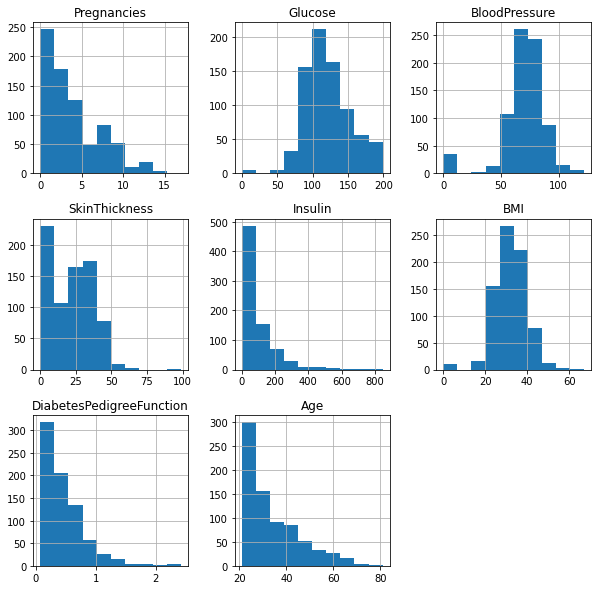

In [10]:
data.hist(figsize=(10,10))
plt.show()

Some features seems to have wrong values(0), which can be seen from the histogram plots. Number of Pregnancies can be 0 but other features like Glucose, Blood pressure, Skin Thiness, Insulin and BMI can't be 0.

In [11]:
print(data.eq(0).sum()) # Finding the number of '0'values in each column

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can use the features' median values to replace with zeroes. But in the case of insulin there are too many null values, so it would be better to drop that feature.

In [12]:
data['Glucose'].replace(to_replace=0,value=data['Glucose'].median(),inplace=True)
data['BloodPressure'].replace(to_replace=0,value=data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].replace(to_replace=0,value=data['SkinThickness'].median(),inplace=True)
data['BMI'].replace(to_replace=0,value=data['BMI'].median(),inplace=True)
data.drop(['Insulin'],axis=1,inplace=True)

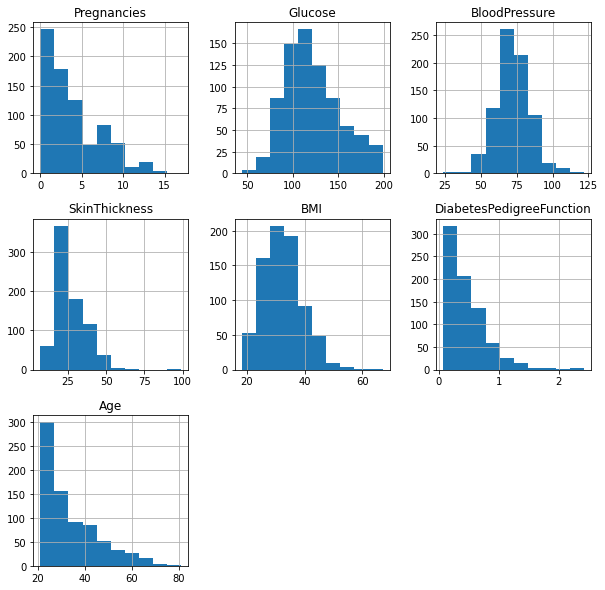

In [13]:
data.hist(figsize=(10,10))
plt.show()

Now we can see none of the features contain 0 value except Pregnancies

##Let us look at the spread of the data.

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.621904,72.387223,27.324641,32.449413,0.471674,33.219035
std,3.370877,30.443252,12.104527,9.230877,6.879727,0.331497,11.752296
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,23.000000,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,36.600000,0.625000,41.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000


It seems some features are having outlier values, like no. of pregnancies is going as high as 17 where as the median('50%') is 3 and maximum age is 81 as compared to median 29.These high values might be outliers.

**Outliers** are extreme values, which can affect our model, so we need to remove them.

Let us visualise the data using box plot. It will give us an idea of the spread of data and the outliers. 

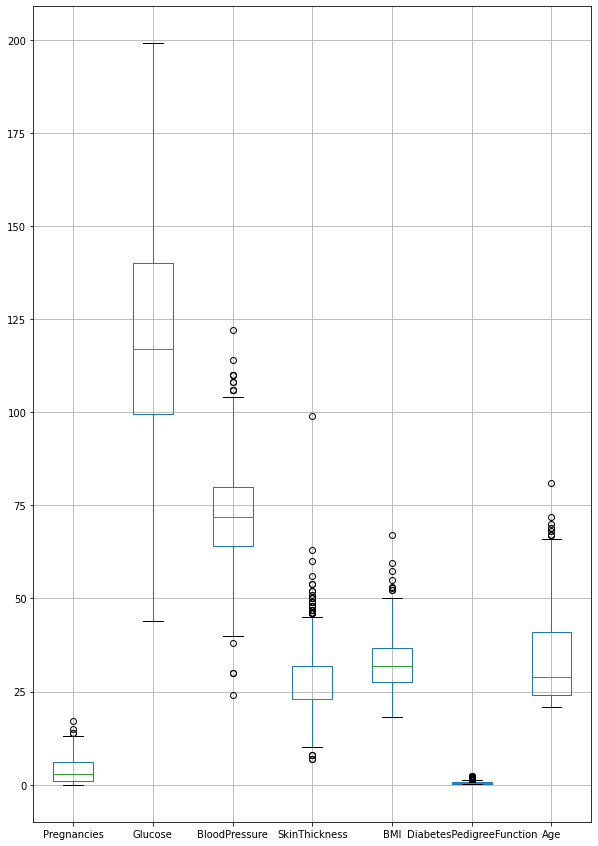

In [15]:
data.boxplot(figsize=(10,15))
plt.show()

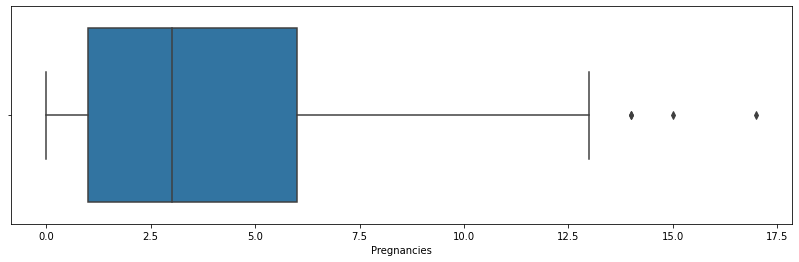

In [16]:
plt.figure(figsize=(14,4))
sns.boxplot(data=data,x="Pregnancies")
plt.show()

We can see Pregnancies, BloodPressure, SkinThickness, BMI and Age are having several outliers.

### Normal Distribution Curve - Before Removing Outliers



OptionError: No such keys(s): 'mode.use_inf_as_null'

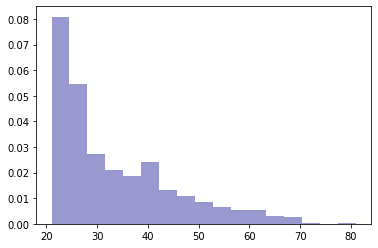

In [17]:
sns.distplot(data['Age'], hist=True, kde=True, color = 'darkblue')

From the above plot we can see there are very less number of samples having age 70 to 80. They seem to be outlier values.

In [18]:
for col in ['Pregnancies','BloodPressure','SkinThickness', 'BMI','Age']:
    percentiles = data[col].quantile([0.01,0.99]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
    data[col] = np.clip(data[col], percentiles[0], percentiles[1])

The outliers have been clipped using the numpy's clip function.Now our data contains the values which are in percentile range of 1 to 99

###Normal distribution curve after removing outlier

In [28]:
#sns.distplot(data['Age'],kde=True, color = 'darkblue')

In the above plot we can see the outliers are capped with 1 to 99 percentile values.

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.831812,121.621904,72.410691,27.234316,32.400464,0.471674,33.183833
std,3.338067,30.443252,11.709697,8.743843,6.671910,0.331497,11.637086
min,0.000000,44.000000,44.000000,10.000000,19.500000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,23.000000,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,36.600000,0.625000,41.000000
max,13.000000,199.000000,106.000000,51.340000,50.782000,2.420000,67.000000


###Convert Categorical feature to Numerical values

We will use Label Encoding for this purpose, Label Encoding encodes the label with values 0 to (no_of_classes-1).



In [21]:
le=LabelEncoder()
data['Outcome']=le.fit_transform(data['Outcome'])

In [22]:
data.head() #Encoded values

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29.0,26.6,0.351,31,0
1,8,183,64,23.0,23.3,0.672,32,1
2,1,89,66,23.0,28.1,0.167,21,0
3,0,137,44,35.0,43.1,2.288,33,1
4,5,116,74,23.0,25.6,0.201,30,0


We can now see that **No** from 'Outcome' column has been replaced with **0** and **Yes** has been replaced with **1**

Let us split the data for training and testing.

We are using **train_test_split** method from sklearn.model_selection, which shuffles and split the dataset into training and testing, where the first argument contains the independent features and the second argument contains the dependent feature(i.e. Outcome), the **test_size** is 20% of the original dataset and the **random_state** is being used by the random no. generator, which prevents shuffling of the instances each time we run the code.

In [23]:
# Separate X and y
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test[:5])

(613, 7)
(154, 7)
(613,)
(154,)
353    0
236    1
323    0
98     1
700    1
Name: Outcome, dtype: int32


In [25]:
# build model
model = LogisticRegression() #DecisionTreeClassifier() 
# train the model
model.fit(X_train,y_train)
# evaluate the model
print("Train Accuracy: ",model.score(X_train,y_train))
print("Test Accuracy: ",model.score(X_test,y_test))

Train Accuracy:  0.768352365415987
Test Accuracy:  0.7792207792207793


In [29]:
# build model
model = DecisionTreeClassifier() 
# train the model
model.fit(X_train,y_train)
# evaluate the model
print("Train Accuracy: ",model.score(X_train,y_train))
print("Test Accuracy: ",model.score(X_test,y_test))

Train Accuracy:  1.0
Test Accuracy:  0.6948051948051948


In [30]:
from sklearn.tree import plot_tree, export_graphviz

In [ ]:
plt.figure(figsize=(14,20))
plot_tree(model,feature_names=X_train.columns,rounded=True,filled=True)
plt.show()

#Creating the base model
A base model is a very basic model which can be further used for comparision with other models. In this model we just use the preprocessed data without applying any feature engineering.

Now we will use **cross validation** technique to check which model will work good on this problem. We are using several algorithm for comparision, (some of the algorithms will be discussed later). 

We have used K-Fold cross validation technique. Here Kfold is dividing the training data in 10(K) equal splits. Keeping 1 split for testing and rest for training, and it is done for 10 times with each split.

In [ ]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))


for name,model in models:
  kfold=KFold(n_splits=10,random_state=7) 
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))


lr : acc: 0.7683236382866209(standard deviation: 0.07141711718880085)
decision tree : acc: 0.6591750396615546(standard deviation: 0.03850054617975507)
svm : acc: 0.6457694341618191(standard deviation: 0.06599166260861399)
knn : acc: 0.732469592808038(standard deviation: 0.07294111567425018)
naive bayes : acc: 0.7503701745108409(standard deviation: 0.06273923098301763)
Random Forest : acc: 0.753648863035431(standard deviation: 0.05844534385113101)


Here we can see logistic regression has quite good accuracy as compared to other models.

#As the base model has been created. Let us try to improve our model.


##**Re-analysing the prepared data for selecting important features**
Let us **visualise the correlation**. Correlation lies between -1 to 1, where values near to 1 shows high positive correlation and values near -1 shows high negative correlation.
Visualising the correlation helps us in selecting important features for prediction,as the feautures having low correlation with the dependent variable can be dropped as they are not effecting the predictions.

This feature selection enhance our modelling, as training the model becomes faster since we have reduced the size of the data, and now our model are less prone to overfit.

In [ ]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125937,0.211313,0.039694,0.025192,-0.034762,0.549266,0.218981
Glucose,0.125937,1.000000,0.219989,0.159246,0.233282,0.136884,0.267494,0.492079
BloodPressure,0.211313,0.219989,1.000000,0.161918,0.290596,0.001085,0.333838,0.170113
SkinThickness,0.039694,0.159246,0.161918,1.000000,0.561981,0.137595,0.042026,0.186819
BMI,0.025192,0.233282,0.290596,0.561981,1.000000,0.147735,0.033894,0.312978
DiabetesPedigreeFunction,-0.034762,0.136884,0.001085,0.137595,0.147735,1.000000,0.032789,0.173245
Age,0.549266,0.267494,0.333838,0.042026,0.033894,0.032789,1.000000,0.240264
Outcome,0.218981,0.492079,0.170113,0.186819,0.312978,0.173245,0.240264,1.000000


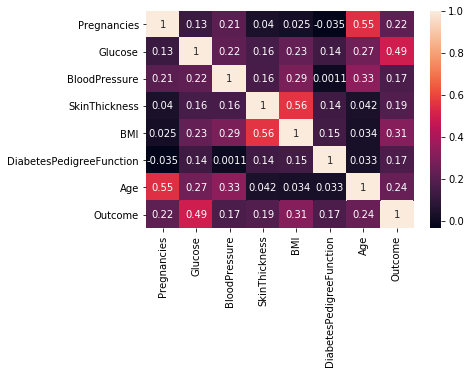

In [ ]:
sns.heatmap(correlation, annot = True)


From the above heatmap we can easily tell that patients with high **Pregnancies, Glucose, BMI and Age** do have more chances of being diabetic, as they have high correlation with the target variable.

Also, if 2 independent features show high correlation, we can just keep one of them as both are revealing same type of information, for ex, in the above heatmap we can see Age and Pregnancies are showing high correlation. So we can **just use the Age column and leave the Pregnancies column**.

Now let us try to create a model using just these 3 features: **Glucose, BMI and Age**

In [ ]:
modified_X_train= X_train[['Glucose','BMI','Age']]
modified_X_test= X_test[['Glucose','BMI','Age']]

We can also scale our features to normalise them in a certain range. We are using StandadScaler from sklearn.preprocessing. StandardScaler transforms all the features to have values with mean=0 and variance=1

Generaly scaling improves our model's performance specially with linear models.

In [ ]:
scaler = StandardScaler()
scaler.fit(modified_X_train)
scaled_X_train = scaler.transform(modified_X_train)
scaler.fit(modified_X_test)
scaled_X_test=scaler.transform(modified_X_test)

##Selecting the model using cross validation

In [ ]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))

acc=[]
nam=[]

for name,model in models:
  kfold=KFold(n_splits=10,random_state=7) 
  cross_val_sc=cross_val_score(model,scaled_X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : accuracy:{}( standard deviation:{})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))
  acc.append(cross_val_sc.mean()*100)
  nam.append(name)


lr : accuracy:0.760074034902168( standard deviation:0.06953974499959363)
decision tree : accuracy:0.675251189846642( standard deviation:0.05387860621232456)
svm : accuracy:0.7650449497620307( standard deviation:0.062338431979468846)
knn : accuracy:0.7029878371232152( standard deviation:0.0716984235327592)
naive bayes : accuracy:0.7748281332628238( standard deviation:0.06268513430723137)
Random Forest : accuracy:0.7177419354838709( standard deviation:0.0441977169962452)


Let us visualize the accuracy,
We can easily see from the bar plot, logistic regression is giving us quite good accuracy.

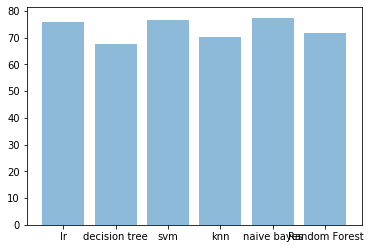

In [ ]:
height=np.arange(0,101,5)
plt.bar(np.arange(len(nam)),acc,align='center',alpha=0.5)
plt.xticks(np.arange(len(nam)),nam)
plt.show()

Now let us create the model using logistic regression. 

In [ ]:
model= LogisticRegression()
model.fit(scaled_X_train,y_train)
y_pred=model.predict(scaled_X_test)

##**Model Performance**

To check how the model is working on the test data, we will use confusion matrix.

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[89 15]
 [22 28]]


Values in the confusion matrix denotes:

* 89: **True Positive:** patients who were diabetic are predicted as diabetic

* 15: **False positive:** patients who were not diabetic are predicted as diabetic

* 22: **False negative:** patients who were diabetic are predicted as not diabetic

* 28: **False positive:** patients who were not diabetic and also predicted as non-diabetic 


##Further steps to improve your model

You can use the following methods to improve your model. These will be taught in depth in later modules.
* Add more data
* Hyperparameter Tuning
* Feature Engineering
* Dimenstionality Reduction 
* Ensemble Method
  * Boosting Algorithm
  * Bagging Algorithm
* Cross Validation Techniques
